<a href="https://colab.research.google.com/github/NehilDanis/Flownet/blob/master/dataloaderExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataLoader Example with Pytorch

PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use **pre-loaded datasets** as well as **your own data**. Dataset stores the samples and their corresponding labels, and DataLoader wraps an **iterable** around the Dataset to enable easy access to the samples.

Pre-loaded datasets can be found under Image Datasets, Text Datasets, and Audio Datasets.

## Load a dataset provided by pytorch

In [3]:
# necessary imports

import torch
from torchvision import datasets
from torchvision.transforms import ToTensor # here there are many more 
# transformations

# for visualization
import matplotlib.pyplot as plt


In [4]:
# obtain data

traindata = datasets.FashionMNIST(
    root='data', # path where the train/test data is stored
    train=True, # indicates whether it is a train or test set
    download=True, # downloads data from the internet if it is not available 
    # from the root
    transform=ToTensor() # transform and target_transform specify the feature and 
    # label transformations
)

testdata = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



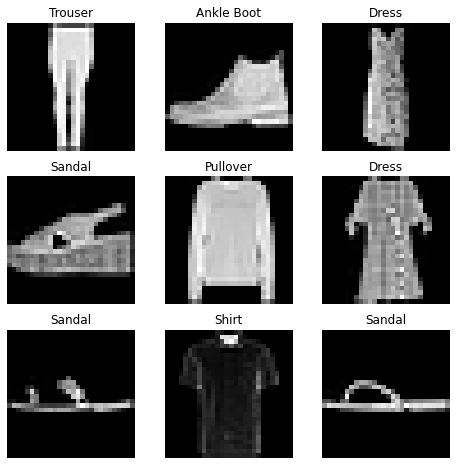

In [13]:
# visualize datasets

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3 

for i_fig in range(1, cols * rows + 1):
  sample_ind =  torch.randint(len(traindata), size=(1,)).item()
  img, label = traindata[sample_ind]
  figure.add_subplot(rows, cols, i_fig)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show();

## Load custom dataset

Custom dataset class must implement three functions: `__init__`, `__len__`, `__get_item__`. 

In [15]:
import os
import pandas as pd # to be able to read the csv files.
from torchvision.io import read_image
from torch.utils.data import Dataset

# Double underscore before and after the function name is used to differentiate 
# that the function is not user defined but overriden from another module.

class CustomDataset(Dataset):
  def __init__(self, annotation_file, img_dir, transform=None, 
               target_transform=None):
    # annotation_file: the file where labels are kept
    # img_dir: the directory where samples are kept
    # transform: the transformations which will be applied to samples
    # target_transform: the transformations which will be applied to labels
    self.labels = pd.read_csv(annotation_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.labels)
  
  def __get_item__(self, idx):
    img_path = os.path.join(self.img_dir, self.labels.iloc[idx, 0]) 
    image = read_image(img_path)
    label = self.labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label


In [16]:
# create dataloaders

from torch.utils.data import DataLoader

train_dataloader = DataLoader(traindata, batch_size=64, shuffle=True)
test_dataloader = DataLoader(testdata, batch_size=64, shuffle=True)


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


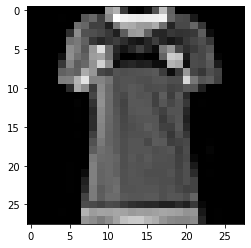

Label: 0


In [18]:
# iterate thru dataloader
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")